<a href="https://colab.research.google.com/github/vani2730/VaniPanditML/blob/main/StressDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np

In [ ]:
df_subreddit=pd.read_csv("/content/subreddit.csv")
df_subreddit.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df_subreddit.isnull()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2834,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2835,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2836,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
df_subreddit.isnull().sum().sum()

59875

In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df_subreddit["text"] = df_subreddit["text"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


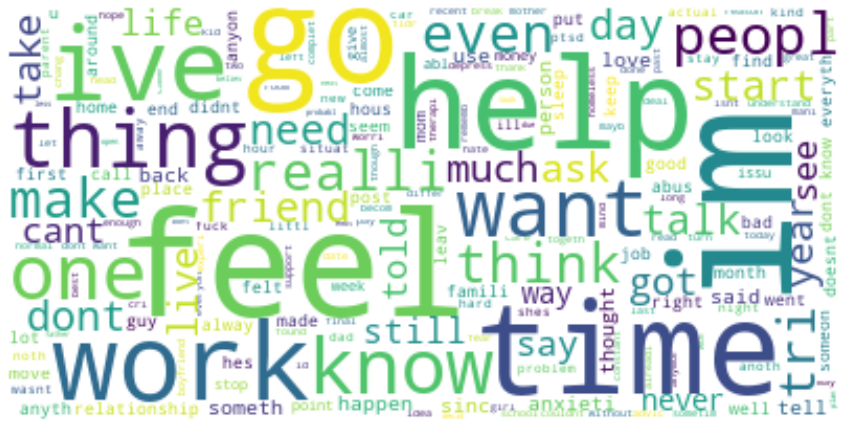

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df_subreddit.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_subreddit["label"] = df_subreddit["label"].map({0: "No Stress", 1: "Stress"})
data = df_subreddit[["text", "label"]]

In [ ]:
print(df_subreddit.tail())

           subreddit post_id sentence_range  \
2833   relationships  7oee1t       [35, 40]   
2834            ptsd  9p4ung       [20, 25]   
2835             NaN     NaN            NaN   
2836  almosthomeless  5y53ya        [5, 10]   
2837            ptsd  5y25cl         [0, 5]   

                                                   text    id label  \
2833   week ago precious ignor  jan  happi year prec...  1713   NaN   
2834  dont abil cope anymor im tri lot thing trigger...  1133   NaN   
2835                                                nan   NaN   NaN   
2836  find normal good relationship main problem see...  1834   NaN   
2837  talk mom morn said sister trauma wors mine did...   961   NaN   

       confidence social_timestamp social_karma    syntax_ari  ...  \
2833            1       1515187044           13  -1.369333333  ...   
2834            1       1539827412           33   9.425477855  ...   
2835          NaN              NaN          NaN           NaN  ...   
2836  0.57

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["text"])
y = np.array(data["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.33, 
                                                random_state=42)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

ValueError: ignored